In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model


In [8]:
df = pd.read_csv('honeyproduction.csv')
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [10]:
prod_per_year = df.groupby('year').totalprod.mean().reset_index()
print(prod_per_year)

    year     totalprod
0   1998  5.105093e+06
1   1999  4.706674e+06
2   2000  5.106000e+06
3   2001  4.221545e+06
4   2002  3.892386e+06
5   2003  4.122091e+06
6   2004  4.456805e+06
7   2005  4.243146e+06
8   2006  3.761902e+06
9   2007  3.600512e+06
10  2008  3.974927e+06
11  2009  3.626700e+06
12  2010  4.382350e+06
13  2011  3.680025e+06
14  2012  3.522675e+06


In [16]:
X = prod_per_year['year']
X = X.values.reshape(-1, 1)
print(X)

[[1998]
 [1999]
 [2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]]


In [17]:
y = prod_per_year["totalprod"]
print(y)

0     5.105093e+06
1     4.706674e+06
2     5.106000e+06
3     4.221545e+06
4     3.892386e+06
5     4.122091e+06
6     4.456805e+06
7     4.243146e+06
8     3.761902e+06
9     3.600512e+06
10    3.974927e+06
11    3.626700e+06
12    4.382350e+06
13    3.680025e+06
14    3.522675e+06
Name: totalprod, dtype: float64


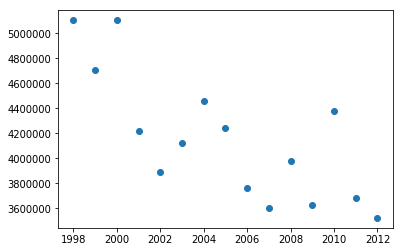

In [18]:
plt.scatter(X, y)
plt.show()

In [24]:
lgr = linear_model.LinearRegression()
lgr.fit(X,y)
print(lgr.coef_)
print(lgr.intercept_)

[-88303.18915238]
181208083.1073298


In [27]:
y_pred = lgr.predict(X)
print(y_pred)

[4778311.18087068 4690007.99171829 4601704.8025659  4513401.61341354
 4425098.42426115 4336795.23510876 4248492.04595637 4160188.85680401
 4071885.66765162 3983582.47849923 3895279.28934684 3806976.10019448
 3718672.91104209 3630369.7218897  3542066.53273734]


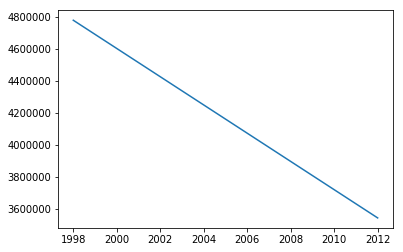

In [28]:
plt.plot(X, y_pred)
plt.show()

In [29]:
X_future = np.array(range(2013, 2050))
X_future = X_future.reshape(-1, 1)

In [30]:
future_predict = lgr.predict(X_future)

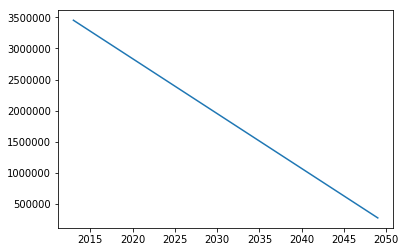

In [31]:
plt.plot(X_future,future_predict)
plt.show()

In [ ]:
# So, we can see the honey production will decline by 2050.